**Osservazioni generali**  
Per mantenere un codice più "snello" in questo notebook è riportata solo l'analisi relativa all'ellitticità.

# Preparazione Dati

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import functions as f

Importo file e aggiungo una colonna _check_ che alterna True e False

In [2]:
data = pd.read_csv('data_fs.dat', delim_whitespace=True, decimal=",")
f.add_bool(data)

In [3]:
data_int = data[data['check'] == True]
data_check = data[data['check'] == False]

"Filtro" i dati rimuovendo i punti sul bordo, ovvero quelli con |x| o |y| > 0.3

In [4]:
mask = (abs(data_check["x"]) < 0.3) & (abs(data_check["y"]) < 0.3)
data_mask = data_check[mask]

In [5]:
data_int = data[data['check'] == True]
data_check = data[data['check'] == False]

---------------

# Interpolazione

L'interpolazione dei dati sarà effettuata su sul dataset `data_int` e la bontà dei risultati sarà verificata valutando la differenza tra dato vero appartenete al dataset `data_check` e quello ottenuto tramite la funzione interpolante.

Seguiremo due approci alternativi, che riguardano:
- il metodo `interp2d` del modulo `scipy.interpolate`
- il metodo `curve_fit` del modulo `scipy.optimize`

Per completezza è stato utilizzato anche il metodo `griddata`

-------

## Interp2d


### Ellitticità

In [6]:
f_int_e = f.int_lin(data_int, "e")
f_check_e = f.int_lin(data_check, "e")

d_e = f.delta(data_check, f_int_e, f_check_e)
d_e_mask = f.delta(data_mask, f_int_e, f_check_e)

/Users/eleonoragatti/opt/anaconda3/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,12 m=84 fp=0.000003 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


#### Descrizione dei grafici
- Errore assoluto tra dati ricavati dall'interpolazione e dati esatti
- Errore assoluto tra dati ricavati dall'interpolazione e dati esatti t.c. Δ < 1
- Errore assoluto tra dati ricavati dall'interpolazione e dati esatti t.c. Δ < 1 espresso in scala logaritmica
- Contour plot della differenza in scala logaritmica

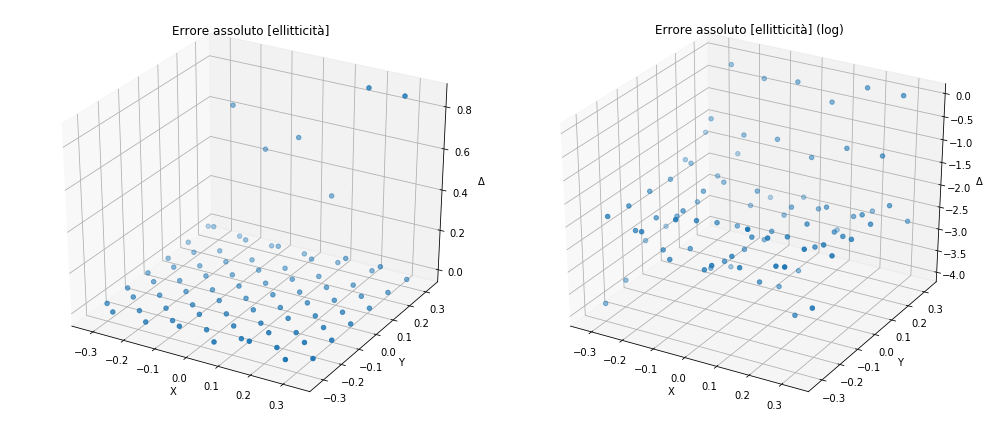

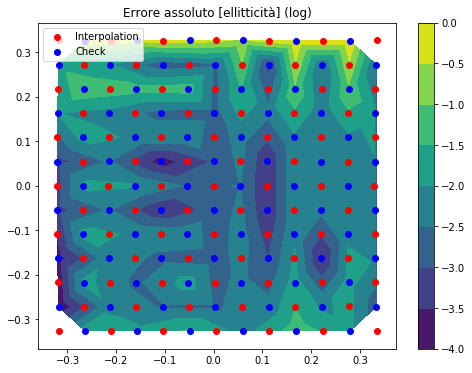

In [7]:
f.graph(data_check, data_int, d_e, "ellitticità")

Si nota che i dati con un errore maggiore sono quelli sul bordo, proviamo perciò a escludere i punti di bordo in fase di verifica, avendoli però considerati in fase di interpolazione.

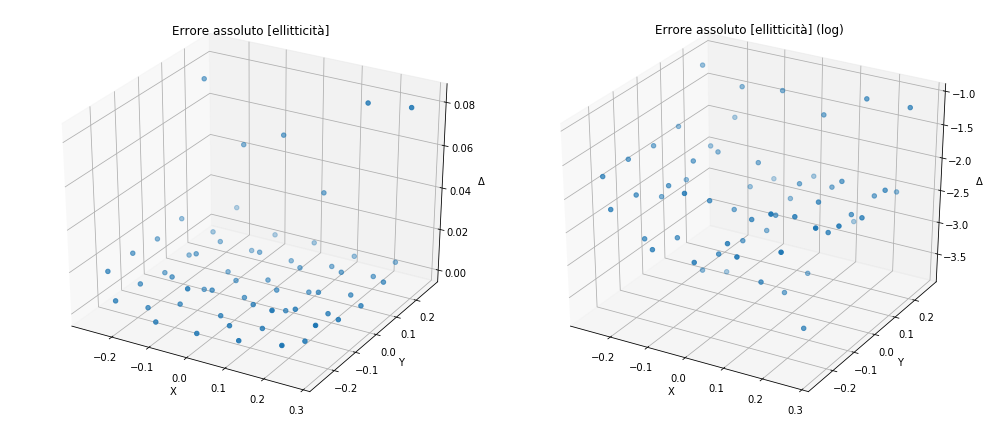

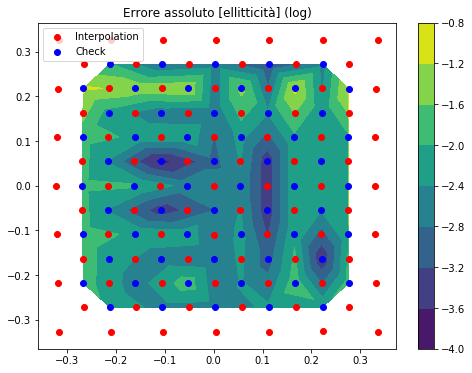

In [8]:
f.graph(data_mask, data_int, d_e_mask, "ellitticità")

-------

## Curve Fit

### Ellitticità

In [15]:
X = [data["x"], data["y"]]
X_check = [data_check["x"], data_check["y"]]
X_int = [data_int["x"], data_int["y"]]

In [16]:
popt, pcov = curve_fit(f.func, X_int, data_int["e"])
test_func_e = f.func(X_check, *popt)

popt1, pcov1 = curve_fit(f.func, X, data["e"])
test_func_e2 = f.func(X_check, *popt1)

Il seguente grafico confronta l'errore assoluto ottenuto tramite un fit eseguito sui dati completi (in blu) o su metà dei dati (in rosso).

Text(0, 0.5, 'Error')

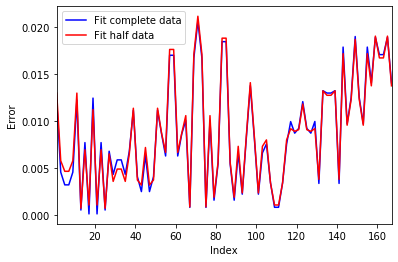

In [17]:
abs(test_func_e2-data_check["e"]).plot(color="blue", label="Fit complete data")
abs(test_func_e-data_check["e"]).plot(color="red", label="Fit half data")
plt.legend(loc='upper left')
plt.xlabel("Index")
plt.ylabel("Error")

Confronto l'errore con quello relativo al metodo di interpolazione `interp2d` (in verde). Sono esclusi i punti di bordo poichè su questi l'errore relativo alla funzione ottenuta tramite `interp2d` risulta essere molto superiore a quello relativo a `curve_fit`, in tali punti l'errore non è comparabile.

Text(0, 0.5, 'Error')

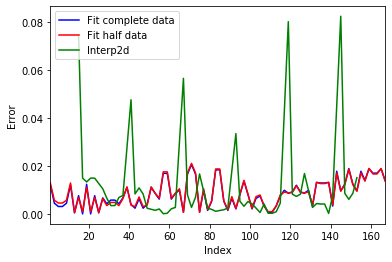

In [18]:
abs(test_func_e2-data_check["e"]).plot(color="blue", label="Fit complete data")
abs(test_func_e-data_check["e"]).plot(color="red", label="Fit half data")
plt.plot(data_mask.index, d_e_mask, color = "green", label="Interp2d")
plt.legend(loc='upper left')
plt.xlabel("Index")
plt.ylabel("Error")

-------

### Full Width Half Maximum Y

In [22]:
popt, pcov = curve_fit(f.func, X_int, data_int["fwhm_y"])
test_func_fwhmy = f.func(X_check, *popt)

popt1, pcov1 = curve_fit(f.func, X, data["fwhm_y"])
test_func_fwhmy2 = f.func(X_check, *popt1)

Text(0, 0.5, 'Errore (°)')

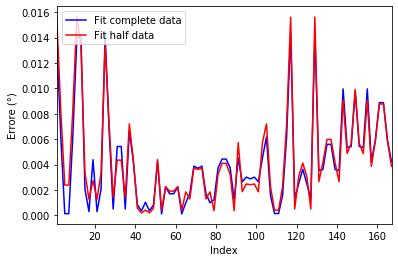

In [23]:
abs(test_func_fwhmy2-data_check["fwhm_y"]).plot(color="blue", label="Fit complete data")
abs(test_func_fwhmy-data_check["fwhm_y"]).plot(color="red", label="Fit half data")
plt.legend(loc='upper left')
plt.xlabel("Index")
plt.ylabel("Errore (°)")

Text(0, 0.5, 'Error (°)')

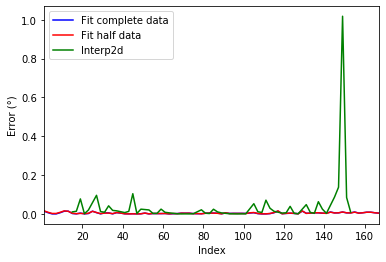

In [24]:
abs(test_func_fwhmy2-data_check["fwhm_y"]).plot(color="blue", label="Fit complete data")
abs(test_func_fwhmy-data_check["fwhm_y"]).plot(color="red", label="Fit half data")
plt.plot(data_mask.index, d_fwhmy_mask, color = "green", label="Interp2d")
plt.legend(loc='upper left')
plt.xlabel("Index")
plt.ylabel("Error (°)")

# LAST BUT NOT LEAST

Plot dell'ellitticità vera e interpolata/fittata su tutti i punti

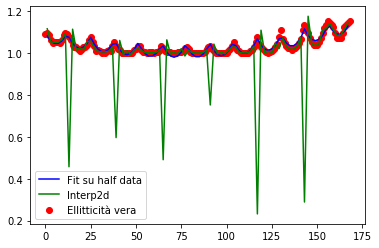

In [25]:
#plt.scatter(data["x"], data["y"], color="orange")
ellit = f.val_int(data_check, f_int_e)
plt.scatter(data.index, data["e"], color="red", label="Ellitticità vera")
plt.plot(test_func_e, label="Fit su half data", color="blue")
plt.plot(data_check.index, ellit, label="Interp2d", color="green")
plt.legend()

Ci sono chiaramente alcuni punti problematici per quanto riguarda il metodo di interpolazione `interp2d`

Scelgo una riga di punti e plotto il parametro relativo a quella riga

FileNotFoundError: [Errno 2] No such file or directory: '/Plot/Row_0.png'

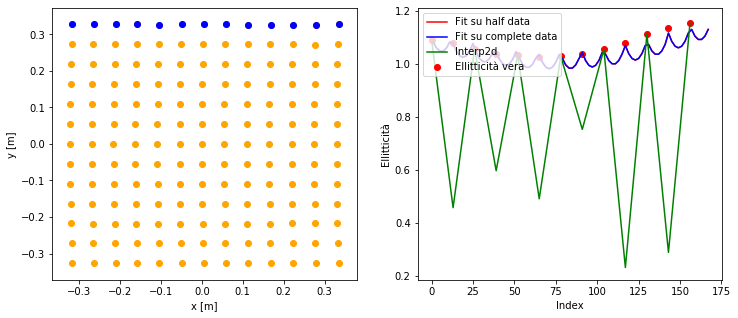

In [26]:
f.check_graph_row(data, f_int_e, test_func_e, test_func_e2)

Scelgo una colonna di punti e plotto il parametro relativo a quella colonna

In [ ]:
f.check_graph_col(data, f_int_e, test_func_e, test_func_e2)

I grafici si trovano nella cartella "Plot". Per ogni riga e per ogni colonna è stato fatto il confronto tra ellitticità vera e "misurata".  

**Righe:** si nota che `interp2d` funziona bene tranne che per le righe 0, 2, 10, 12 (la 0 corrisponde alla riga più in alto e la 12 a quella più in basso)

**Colonne:** in questo caso non è stata plottata la curva ottenuta con curve_fit poichè rappresentata su scala troppo grande (problema risolvibile). Si nota che una riga si e una no è presente un punto iniziale della spezzata `interp2d` che crea problemi, al momento non so risolvere e giustificare tale comportamento

-------

## Griddata

La funzione _grid_ prende in input il file di dati e il parametro che vuoi considerare e gli array che formano la griglia su cui interpolare (xpoints, ypoints)

In [ ]:
xpoints = f.linspace(data["x"], 500)
ypoints = f.linspace(data["y"], 500)

### Ellitticità

In [ ]:
e2_int = f.grid(data_int, "e", xpoints, ypoints)
e2_check = f.grid(data_check, "e", xpoints, ypoints)
f.cgraph(data_check, xpoints, ypoints, e2_int, e2_check)

### Full Width Half Maximum X

In [ ]:
fwhmx2_int = f.grid(data_int, "fwhm_x", xpoints, ypoints)
fwhmx2_check = f.grid(data_check, "fwhm_x", xpoints, ypoints)
f.cgraph(data_check, xpoints, ypoints, fwhmx2_int, fwhmx2_check)

### Full Width Half Maximum Y

In [ ]:
fwhmy2_int = f.grid(data_int, "fwhm_y", xpoints, ypoints)
fwhmy2_check = f.grid(data_check, "fwhm_y", xpoints, ypoints)
f.cgraph(data_check, xpoints, ypoints, fwhmy2_int, fwhmy2_check)